# Forecasting Unilever with FBProphet

In [1]:
import pandas as pd
import numpy as np 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UNVR.csv')
df.head()

timestamp  open  low  high  close  volume
0  2001-04-16   615  605   675    675       0
1  2001-04-17   615  605   675    675       0
2  2001-04-18   615  605   675    675       0
3  2001-04-19   615  605   675    675       0
4  2001-04-20   615  605   675    675       0

In [3]:
df = df[['timestamp', 'close']]
df

timestamp  close
0     2001-04-16    675
1     2001-04-17    675
2     2001-04-18    675
3     2001-04-19    675
4     2001-04-20    675
...          ...    ...
5480  2022-04-18   3390
5481  2022-04-19   3350
5482  2022-04-20   3470
5483  2022-04-21   3400
5484  2022-04-22   3430

[5485 rows x 2 columns]

In [4]:
df = df.rename(columns={'timestamp':'ds', 'close':'y'})
df

ds     y
0     2001-04-16   675
1     2001-04-17   675
2     2001-04-18   675
3     2001-04-19   675
4     2001-04-20   675
...          ...   ...
5480  2022-04-18  3390
5481  2022-04-19  3350
5482  2022-04-20  3470
5483  2022-04-21  3400
5484  2022-04-22  3430

[5485 rows x 2 columns]

In [5]:
test = df[len(df)-20:]
test

ds     y
5465  2022-03-28  3460
5466  2022-03-29  3480
5467  2022-03-30  3720
5468  2022-03-31  3660
5469  2022-04-01  3620
5470  2022-04-04  3570
5471  2022-04-05  3680
5472  2022-04-06  3600
5473  2022-04-07  3570
5474  2022-04-08  3540
5475  2022-04-11  3460
5476  2022-04-12  3520
5477  2022-04-13  3440
5478  2022-04-14  3400
5479  2022-04-15  3400
5480  2022-04-18  3390
5481  2022-04-19  3350
5482  2022-04-20  3470
5483  2022-04-21  3400
5484  2022-04-22  3430

In [6]:
df=df[:-20]
df

ds     y
0     2001-04-16   675
1     2001-04-17   675
2     2001-04-18   675
3     2001-04-19   675
4     2001-04-20   675
...          ...   ...
5460  2022-03-21  3460
5461  2022-03-22  3490
5462  2022-03-23  3410
5463  2022-03-24  3380
5464  2022-03-25  3400

[5465 rows x 2 columns]

In [7]:

#Create Prophet object model
fbp = Prophet(daily_seasonality = True)
#fit or train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=365)
forecast=fbp.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [23]:
fbp

In [8]:
#import the facebook prophet ploting libraries
from fbprophet.plot import plot_plotly
#plot the data
plot_plotly(fbp,forecast)

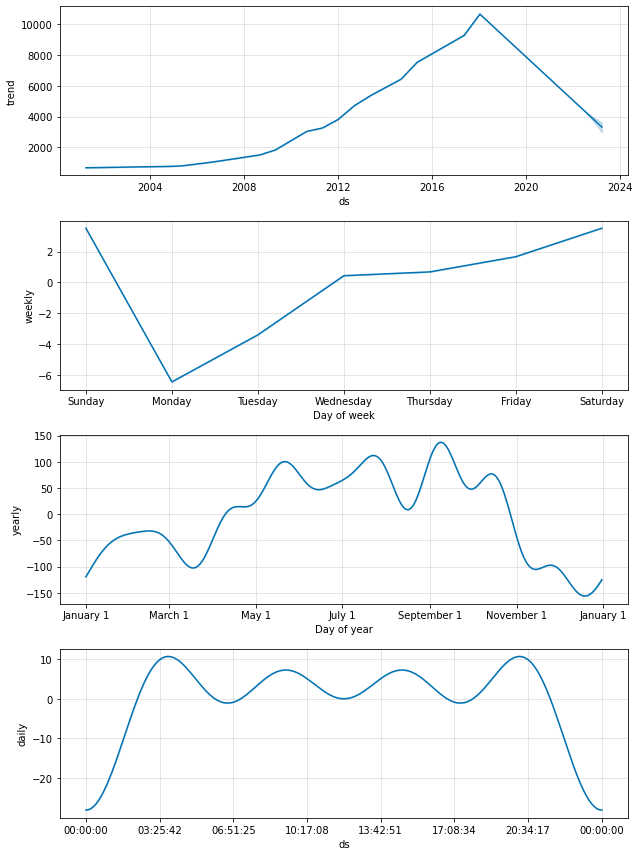

In [9]:
fig2 = fbp.plot_components(forecast)
plt.show()

In [10]:
#show the model prediction
forecast[forecast.ds=='2021-10-14']['yhat']

5348    5412.4681
Name: yhat, dtype: float64

In [11]:
df[df.ds == '2021-10-14']['y']

5348    5325
Name: y, dtype: int64

###

In [34]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df

ds         yhat      y
0    2001-04-16   643.729415  675.0
1    2001-04-17   647.285883  675.0
2    2001-04-18   651.359883  675.0
3    2001-04-19   651.662694  675.0
4    2001-04-20   652.581695  675.0
...         ...          ...    ...
5825 2023-03-21  3202.197679    NaN
5826 2023-03-22  3204.315814    NaN
5827 2023-03-23  3203.498194    NaN
5828 2023-03-24  3204.032597    NaN
5829 2023-03-25  3206.004830    NaN

[5830 rows x 3 columns]

In [35]:
metric_df.dropna(inplace=True)
metric_df.tail()

ds         yhat       y
5460 2022-03-21  4615.939380  3460.0
5461 2022-03-22  4617.433569  3490.0
5462 2022-03-23  4620.347373  3410.0
5463 2022-03-24  4620.294040  3380.0
5464 2022-03-25  4621.547627  3400.0

In [36]:
r2_score(metric_df.y, metric_df.yhat)

0.9802203654320758

In [37]:
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print("Mean squared error of forecast is {}".format(round(mse,2)))

Mean squared error of forecast is 214555.1


In [20]:
from fbprophet.diagnostics import cross_validation

In [21]:
df_cv = cross_validation(fbp, 
                         horizon="365 days",
                         period="182.5 days", 
                         initial="730 days", 
                         parallel=None
                        )

INFO:fbprophet:Making 36 forecasts with cutoffs between 2003-09-28 12:00:00 and 2021-03-25 00:00:00


In [22]:
from fbprophet.diagnostics import performance_metrics

performance_metrics(df_cv, rolling_window=1)

horizon           mse         rmse         mae      mape     mdape  \
0 365 days  1.048117e+06  1023.775897  680.085297  0.150756  0.117364   

   coverage  
0  0.249787

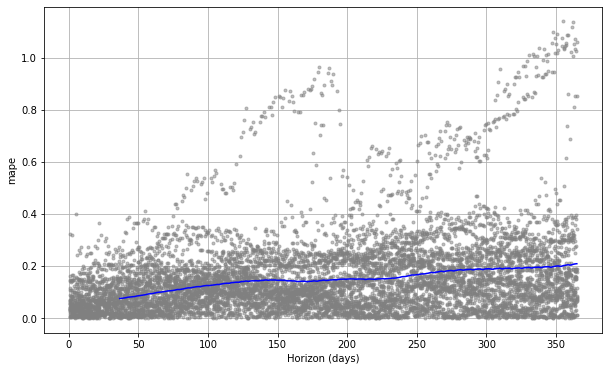

In [32]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
